In [1]:
import pandas as pd
import os, sys

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../../')))

from utils.time_utils import TimeProcessorSDPA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_dir = "/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling"
time_processor_mm = TimeProcessorSDPA(base_dir)
df = time_processor_mm.get_data(sample_rate=0.7)

In [3]:
df

,kernel_params,dtype,backend,b,h,s_q,s_kv,d_qk,d_v,is_causal,time,gflops
0,b16.flash.2.4.16.16.240.240.1,b16,flash,2,4,16,16,240,240,1,0.026624,0.001966
1,b16.flash.2.4.2048.2048.208.208.1,b16,flash,2,4,2048,2048,208,208,1,0.200192,27.917287
2,b16.flash.2.4.2.2048.80.80.0,b16,flash,2,4,2,2048,80,80,0,0.035840,0.010486
3,b16.flash.64.4.128.32.240.240.0,b16,flash,64,4,128,32,240,240,0,0.046080,1.006633
4,b16.flash.32.4.4096.32.96.96.0,b16,flash,32,4,4096,32,96,96,0,0.172544,6.442451
...,...,...,...,...,...,...,...,...,...,...,...,...
99723,32.efficient.128.16.512.64.128.256.1,32,efficient,128,16,512,64,128,256,1,3.658752,51.539608
99724,32.efficient.2.16.512.128.64.32.1,32,efficient,2,16,512,128,64,32,1,0.043008,0.402653
99725,32.efficient.128.16.128.512.32.256.0,32,efficient,128,16,128,512,32,256,0,4.098560,77.309411
99726,32.efficient.4.16.128.32.64.32.0,32,efficient,4,16,128,32,64,32,0,0.027648,0.050332


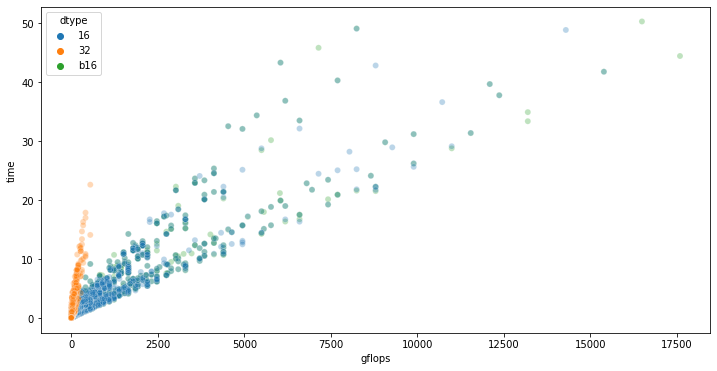

In [4]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="dtype", alpha=0.3, data=df)
plt.show()

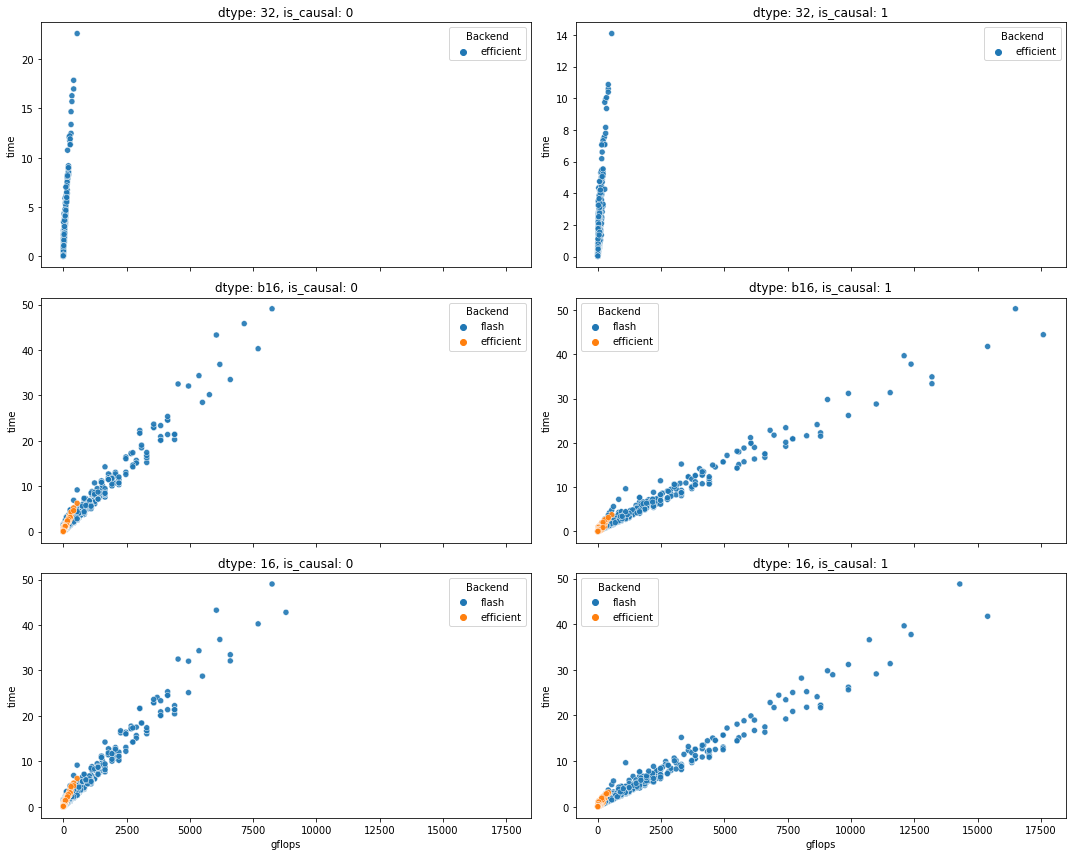

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True, sharey=False)
axes = axes.flatten()

for idx, (dtype, is_causal) in enumerate([(dtype, is_causal) for dtype in ["32", "b16", "16"] for is_causal in [0, 1]]):
    ax = axes[idx]
    sns.scatterplot(
        x="gflops", y="time", hue="backend", alpha=0.9, data=df.query(f"dtype == '{dtype}' and is_causal == '{is_causal}'"), ax=ax
    )
    ax.set_title(f"dtype: {dtype}, is_causal: {is_causal}")
    ax.legend(title="Backend", loc='best')

plt.tight_layout()
plt.show()